# Sales

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [3]:
basepath = r'C:\Clarenti\Data\Project\Data\Analysis\Projects\Marketing Analytics/datasets'

In [4]:
orders_file = r'/orders.csv'

In [5]:
df = pd.read_csv(basepath + orders_file)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_id    9994 non-null   object 
 2   postal_code    9994 non-null   int64  
 3   product_id     9994 non-null   object 
 4   sales          9994 non-null   float64
 5   quantity       9994 non-null   int64  
 6   discount       9994 non-null   float64
 7   profit         9994 non-null   float64
 8   category       9994 non-null   object 
 9   subcategory    9994 non-null   object 
 10  product_name   9994 non-null   object 
 11  order_date     9994 non-null   object 
 12  ship_date      9994 non-null   object 
 13  ship_mode      9994 non-null   object 
 14  customer_name  9994 non-null   object 
 15  segment        9994 non-null   object 
 16  country        9994 non-null   object 
 17  city           9994 non-null   object 
 18  state   

In [7]:
df.head(5)

,order_id,customer_id,postal_code,product_id,sales,quantity,discount,profit,category,subcategory,product_name,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [8]:
df.postal_code = df.postal_code.astype(str)

<Axes: >

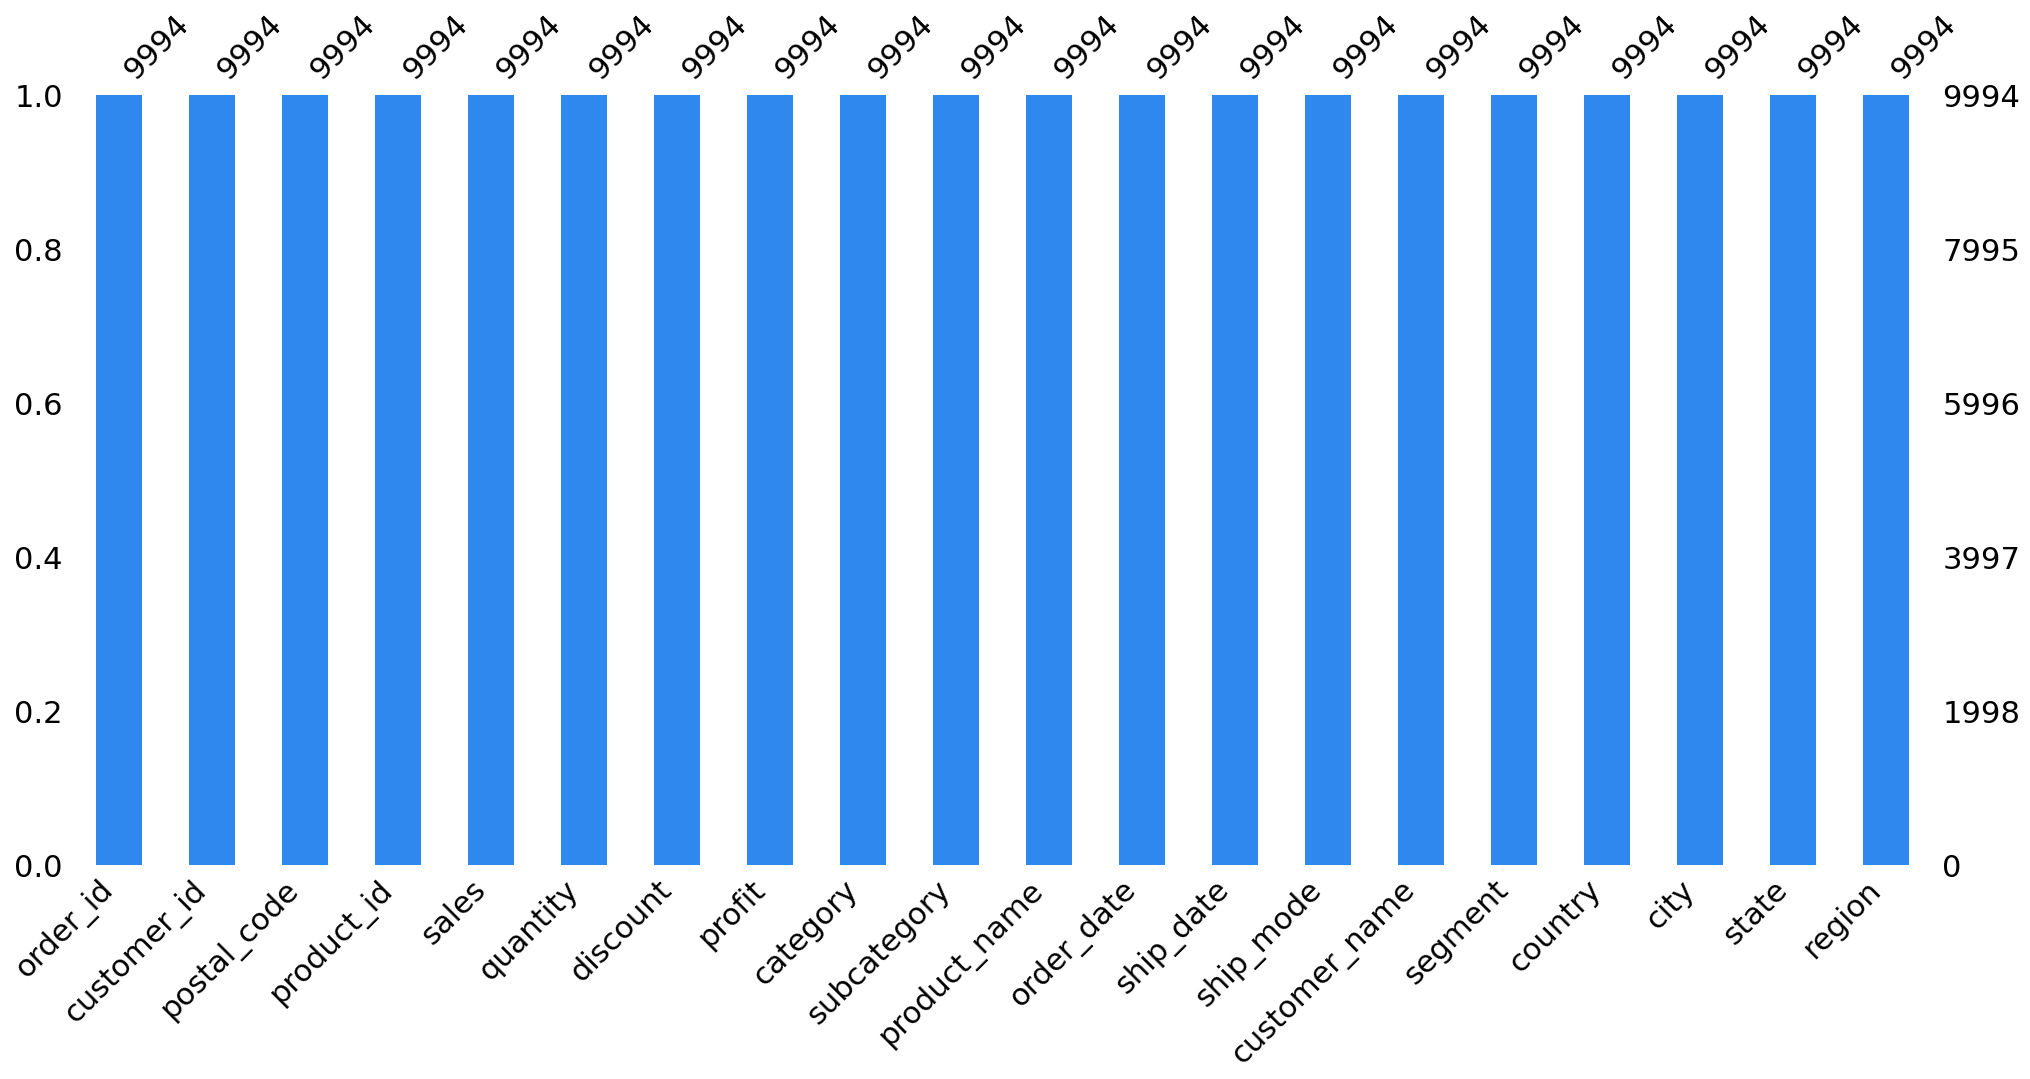

In [23]:
msno.bar(df, fontsize=22, color='#2f88ed')

In [66]:
select_cols = ['category', 'subcategory', 'ship_mode', 'segment', 'country', 'region']
list_item = []
for i in df.loc[:, select_cols].columns:
    list_item.append([i, df[i].nunique(), df[i].drop_duplicates().values])

pd.DataFrame(data=list_item, columns=['features', 'n-unique', 'unique_vals'])

,features,n-unique,unique_vals
0,category,3,"[Furniture, Office Supplies, Technology]"
1,subcategory,17,"[Bookcases, Chairs, Labels, Tables, Storage, F..."
2,ship_mode,4,"[Second Class, Standard Class, First Class, Sa..."
3,segment,3,"[Consumer, Corporate, Home Office]"
4,country,1,[United States]
5,region,4,"[South, West, Central, East]"


In [ ]:
....